In [4]:
from cs103 import *



# CPSC 103 - Systematic Program Design
# Module 04 Day 1
Ian Mitchell, with thanks to Rik Blok and Giulia Toti

---


# Reminders
- this Wed-Fri: Module 4 Tutorial Attendance
- Wed: Module 3 (HtDD): Code Review
- Wed: Module 3 (HtDD): Tutorial Submission
- Wed: Module 1 (Intro): Tutorial Resubmission (optional)
- Mon: Module 5: Pre-Lecture Assignment
- Mon: Module 4 (Compound): Worksheet
- next Wed-Fri: Module 5 Week 1 Tutorial Attendance

See your Canvas calendar (https://canvas.ubc.ca/calendar) for details.

---

# Aside: Back to intervals

Assume you are working with the following data type:

In [2]:
Time = int # in range[0, 86400) 
# interp. seconds since midnight

T_MIDNIGHT = 0 
T_ONE_AM = 3600 
T_NOON = 43200 
T_END_OF_DAY = 86399

@typecheck 
# Template based on Atomic Non-Distinct 
def fn_for_time(t: Time) -> ...: 
    return ...(t)

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

## iClicker question: Back to intervals

Let's say we design a function `is_it_time_yet(t: Time)` based on the data definition for `Time` above.  What happens if our program calls `is_it_time_yet(99999)`?

<!-- formatting: add two spaces at end of line to force linebreak -->

A. The program accepts the value and continues  
B. The program generates an error  
C. The program waits for a valid `Time`  
D. The program terminates abruptly  
E. Something else  

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>

How is the range specified in the data definition?  Does Python know what the range is?

</details>

---

## Designing functions (HTD<u>F</u>) with intervals
When designing functions (HTD<u>**F**</u>) you will sometimes use intervals as function inputs or outputs.  Here are some things to consider.

<div class="alert alert-success">
    
### ✅ Intervals as function inputs (parameters)
In this course, you **may assume** that interval values passed into your functions are always valid – that is, within their specified range.  For example, you **don't** need to verify that the parameter `t` is in the range `[0, 86400)` here:
```python
@typecheck 
def is_afternoon(t: Time) -> bool: 
    ''' Returns True if the time `t` is afternoon, otherwise False. '''
    # return True # stub 
    # if t < 0 or t >= 86400: # you are NOT REQUIRED to check this 
    # range, so you can skip this
    # template from Time
    return t >= T_NOON
```
    
</div>
    
<div class="alert alert-warning">
    
### ⚠️ Intervals as function outputs (return values)
    
In this course, you **must ensure** that interval values returned by your functions are always valid – this is, within their specified range.  For example, you **must** check the value of `time_left` before returning it in the function below:
```python
@typecheck
def time_remaining(temperature: float, heat: HeatLevel) -> Time:
    ''' Returns time remaining for a pot to boil. '''
    # return 0 # stub
    # template from atomic non-distinct and HeatLevel
    time_left = (100 - temperature) / heat # arbitrary formula, details unimportant

    # At this point time_left could be outside of Time's allowed range.
    # Need to check range before returning value of type Time.
    if time_left < 0:       
        time_left = 0       
    elif time_left >= 86400:
        time_left = 86399
    return time_left
```

</div>

---

# Data types

### Last week:
- Simple atomic
- Interval
- Enumeration
- Optional

**Q:** What is an example of each?

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Some examples (for review after class)</summary>

- Simple atomic: A student's name (unconstrained `str`)
- Interval: A person's age (`int # in range[0,...)`)
- Enumeration: Flavours of tea (`EARL_GRAY`, `CHAI`, `DARJEELING`)
- Optional: A person's favourite ice cream flavour (`VANILLA`, `STRAWBERRY`, `CHOCOLATE`, or None if person doesn't like ice cream).  But an enumeration would work as well, here.
                                                                                                                 
</details>


### Now:
- **Compound data (Module 4)**

### Later:
- Arbitrary-sized (Module 5)

---

# Module learning goals

By the end of this module, you will be able to:

- Identify problem domain information that should be represented as compound data. 
- Understand and write `NamedTuple` definitions. 
- Use the HtDD, and Data Driven Templates recipes with compound data. 
- Design functions that take in and/or return compound data. 

---

# Compound data

Sometimes, the information to be represented has two or more values that naturally belong together:
- Preferred name, surname, and student ID of a student
- Title, artist, album, and duration of a song
- Title, year, and director of a movie
- ...

Compound data offers a way to handle that!  It lets you create a data definition to represent different **attributes** of a single entity.  For example, we could define a `Student` compound to store a student's preferred name, surname, and ID.

---

# Example
We'll represent compound data with the `NamedTuple` data type.  For example, let's say we wanted to represent a velocity, including a speed and direction:

```python
from typing import NamedTuple 
Velocity = NamedTuple('Velocity', [('speed', float), 
                                   ('dir', int)]) # in range[0,359] 
```
<details class="alert alert-success"><summary style="cursor:pointer; display:list-item">✅ Any number of fields ok</summary>

Alternatively, could have more fields.  Notice the pattern:
```python
Velocity = NamedTuple('Velocity', [('speed', float), 
                                   ('dir', int), # in range[0,359] 
                                   ('x_component', float), 
                                   ('y_component', float)])
```
</details>

```python
# interp. a velocity with its speed in m/s and direction 
# as an angle in degrees with east=0 increasing counterclockwise 

V1 = Velocity(9, 22) 
V2 = Velocity(3.4, 180) 

# template based on Compound 
@typecheck 
def fn_for_velocity(v: Velocity) -> ...: 
	return ...(v.speed, v.dir) 
```
Notice how the fields (`speed` and `dir`) are treated as parameters in the template's `return` statement, using "dot notation":
- A function we design might not use them all but the data template shows all available information
- Each field has a data type.  Can be anything... simple atomic, interval, enumeration, even another compound(!), and more!
    
---

# Glossary
- **tuple** - a set of attributes that belong together (e.g., `Velocity` has attributes `speed` and `dir`)
    - from the latin suffix *-uple*, e.g., co**uple**, tri**ple**, quadr**uple**, quin**tuple**, ...
- **field** - the name of an attribute (e.g., `speed` or `dir`)
- **value** - the data assigned to an attribute (e.g., `3.4` or `180`)
- **instance** - a specific realization of a data type (e.g., `Velocity(3.4, 180)`)

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

### iClicker question: Name that tuple

You're designing a data definition for wall paint, with the following properties: colour, finish (glossy or flat), drying time, and base (oil or latex).

What should you choose for a name to give your new data type?

<!-- formatting: add two spaces at end of line to force linebreak -->
    
A. `Colour`  
B. `Finish`  
C. `DryingTime`  
D. `Base`  
E. Something else  

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>

We want the name to reflect the object with **all** of these attributes.
    
</details>

---

# Instances of compounds

- Create a new instance of a compound data type with name of type and list of values for arguments.  E.g.,
```python
V2 = Velocity(3.4, 180)
```

Need...
- the right number of arguments, e.g. two,
- in the right order, e.g., `speed` before `dir`,
- of the right type, e.g., `float` then `int # in range[0,359]`

(Analagous to argument requirements when calling functions.)

<div class="alert alert-success">
    
### ✅ Creating an instance of a compound data type with named attributes
    
It is also possible to create an instance of compound data using "named attributes".  For example
```python
V2 = Velocity(speed=3.4,dir=180)
```
will produce an instance of Velocity with the same attribute values as the earlier example (which uses what are called "positional attributes").  When you use positional attributes, you must provide the values in exactly the same order as the attributes were defined.  When you use named attributes, you can provide the values in any order; for example
```python
V2 = Velocity(dir=180, speed=3.4)
```
produces an instance of Velocity with the same attribute values as the earlier examples.  That said, you must use the exact names of the attributes (and those names, like everything in Python, are case sensitive).
    
In both cases (named or positional attributes) you must provide values for **all** of the attributes.
    
It is technically possible to mix positional and named attributes when creating an instance of a compound data type, but **do not do that**.  It is way too likely to cause confusion for you or some other reader of your code.
    
In CPSC 103 we will generally stick to using positional attributes during instance creation.
    
</div>


---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Short answer
Besides `preferred_name`, `surname`, and `id`, what's another field you might add to a `Student` compound data type?  Enter the field name as a valid identifier in *snake_case*, e.g., `preferred_name`.  [Set iClicker question type to "Short Answer".]

<!-- formatting: add two spaces at end of line to force linebreak -->


---

# Cartesian coordinates

Let's create a data type to work with the [Cartesian coordinate system](https://en.wikipedia.org/wiki/Cartesian_coordinate_system) in a plane.  Any point can be specified by two numbers: its $x$ and $y$ coordinates.

In [13]:
from typing import NamedTuple
CartesianCoord = NamedTuple('CartesianCoord',[('x', float),
                                             ('y', float)])

#interp. coordinates of a point in the plane.
#x is the horizontal coordinate (positive to the right)
# and y is the vertical coordinate (positive upward)

CC1 = CartesianCoord(9, 3.2)
CC_ORIGIN = CartesianCoord(0,0)
CC2 = CartesianCoord(-2,-4.2)
CC_Y_AXIS = CartesianCoord(0, 99)
CC_X_AXIS = CartesianCoord(-7, 0)

@typecheck

#template based on Compound
def fn_for_cartesian(cc: CartesianCoord) -> ...:
    '''
    ...
    '''
    return ...(cc.x,cc.y)



- Notice the format of the data definition, especially the `(field, type)` pairs in the square brackets:

<details class="alert alert-success"><summary style="display:list-item">✅ 1. Square brackets...</summary>

```python
MyCompound = NamedTuple('MyCompound', [ ... ])
                        
```

</details>

<details class="alert alert-success"><summary style="display:list-item">✅ 2. Surrounding a comma-separated list...</summary>

```python
MyCompound = NamedTuple('MyCompound', [ ... ,
                                        ... ,
                                        ... ,
                                        ...
                                      ])
                        
```

</details>

<details class="alert alert-success"><summary style="display:list-item">✅ 3. Of (field, type) pairs</summary>

```python
MyCompound = NamedTuple('MyCompound', [ ('field1', type1) ,
                                        ('field2', type2) ,
                                        ... ,
                                        ('fieldn', typen)
                                      ])
                        
```

</details>


<details class="alert alert-info" style="cursor:pointer;"><summary style="display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
    
```python
from typing import NamedTuple 

CartesianCoord = NamedTuple('CartesianCoord', [('x', float), 
                                               ('y', float)])  

# interp. Cartesian coordinate in a two-dimensional plane 

CC_ORIG = CartesianCoord(0, 0)
CC1 = CartesianCoord(2, 5.5)
CC2 = CartesianCoord(-1.2, -4.4)

# template based on Compound 
@typecheck 
def fn_for_cartesian_coord(cc: CartesianCoord) -> ...: 
    return ...(cc.x, cc.y)
```
    
</details>

---

# Exercise 1: function for CartesianCoord

**Problem:** Design a function that takes a CartesianCoord variable and computes its distance from the origin (0,0).

Recall, the distance $d$ from the origin can be computed using the [Pythagorean theorem](https://en.wikipedia.org/wiki/Pythagorean_theorem): $d^2 = x^2 + y^2$.

<div style="margin:auto; width:50%">
    
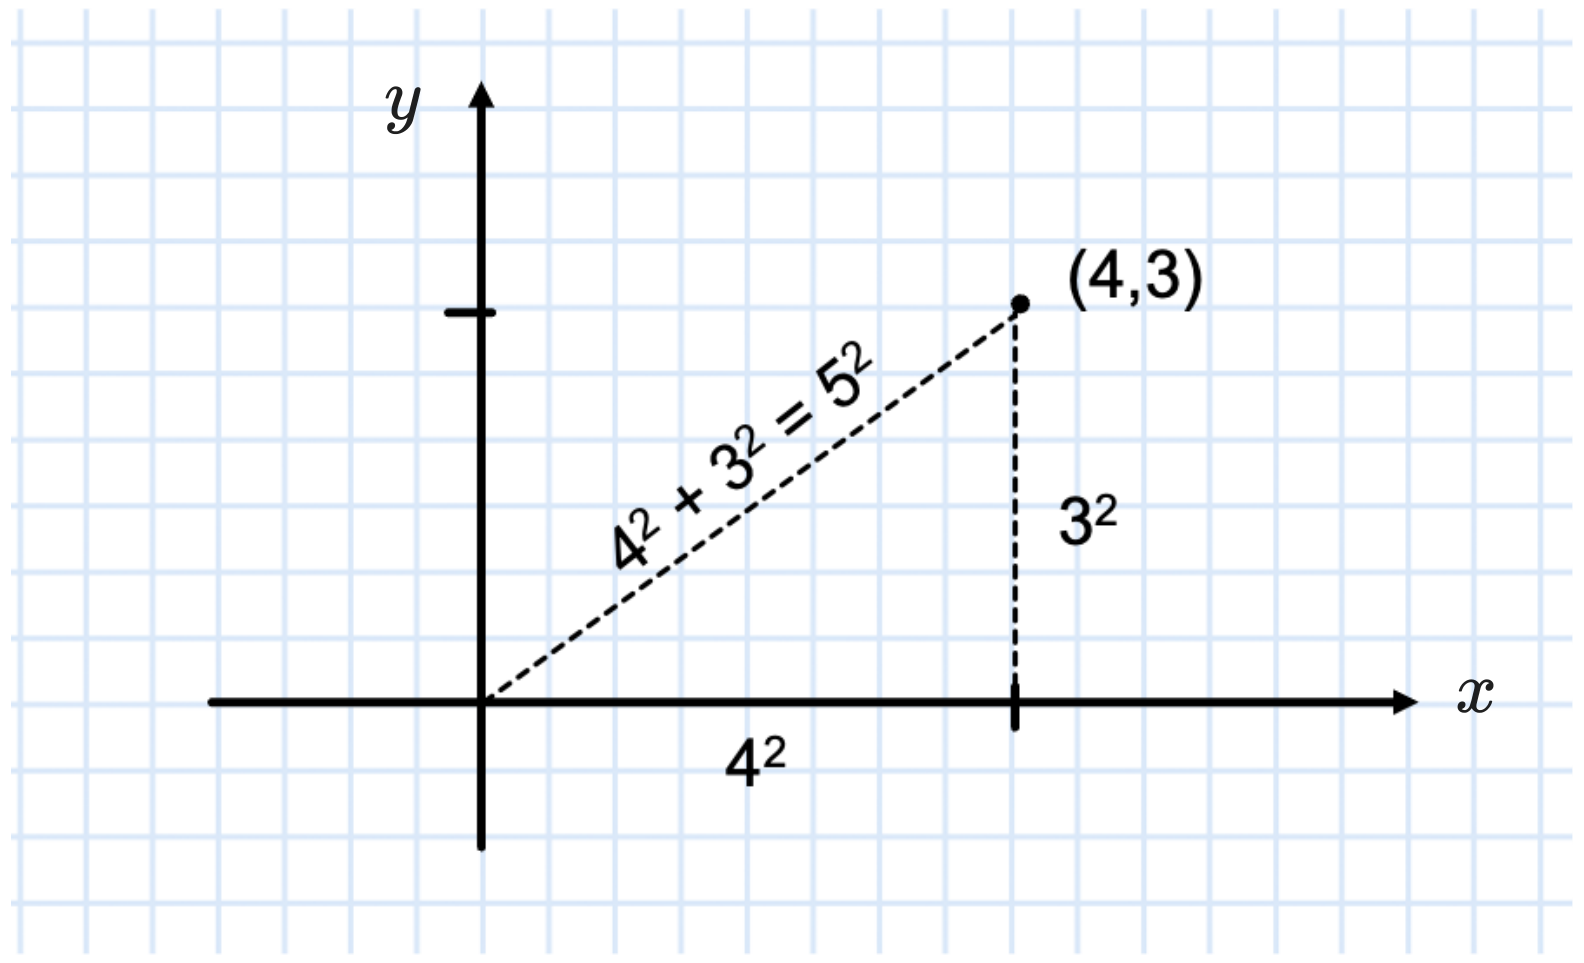
    
</div>

In [18]:
from math import sqrt
# Hint: Pythagoras to the rescue (see picture above)

def dist_to_origin(cc: CartesianCoord) -> float:
    '''
    returns the absolute distance in units to the origin in the plane
    '''
    #return 0.5 #stub
    #template from CartesianCoord
    return sqrt (cc.x**2+cc.y**2)

start_testing()
expect(dist_to_origin(CC_ORIGIN), 0)
expect(dist_to_origin(CC_Y_AXIS), 99)
expect(dist_to_origin(CC_X_AXIS), 7)
expect(dist_to_origin(CartesianCoord(4,3)), 5)
expect(dist_to_origin(CartesianCoord(-5,-12)), 13)
summary()


5 of 5 tests passed


<details class="alert alert-info" style="cursor:pointer;"><summary style="display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
    
```python
from math import sqrt
# Hint: Pythagoras to the rescue (see picture above)
@typecheck
def distance_from_origin(cc: CartesianCoord) -> float:
    """
    The function takes a CartesianCoord variable and computes its distance from the origin (0,0)
    """
    # return -1  # stub
    # Template from CartesianCoord 
    return sqrt(pow(cc.x, 2) + pow(cc.y,2))

start_testing()
expect(distance_from_origin(CC_ORIG), 0)
expect(distance_from_origin(CartesianCoord(3,4)), 5)
expect(distance_from_origin(CartesianCoord(-3,-4)), 5)
expect(distance_from_origin(CartesianCoord(-1.5,2)), 2.5)
summary()
```
    
</details>

---

# Exercise 2: another function for CartesianCoord

**Problem:** Design a function that takes a CartesianCoord variable and returns the corresponding quadrant.

<!-- extra code to overlay x & y axis labels.  From https://www.w3schools.com/howto/howto_css_image_text.asp -->

<div style="float:right;position:relative; margin:auto; text-align:center; width:40%;">
  <a style="color:black;" title="W!B:, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Cartesian-coordinate-system-with-quadrant.svg"><img style="vertical-align:middle" width="100%" alt="Cartesian-coordinate-system-with-quadrant" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Cartesian-coordinate-system-with-quadrant.svg/512px-Cartesian-coordinate-system-with-quadrant.svg.png">
  <div style="position:absolute; top:8px; left:40%; transform:translate(-50%,0%);">$y$</div>
  <div style="position:absolute; top:55%; right:16px; transform:translate(0%,-50%);">$x$</div>
</div>
    
The quadrant corresponds to the coordinates $(x,y)$ as follows:
    
| $x$ | $y$ | Quadrant |
|:---:|:---:|:--------:|
| $x>0$ | $y>0$ | 1 |
| $x<0$ | $y>0$ | 2 |
| $x<0$ | $y<0$ | 3 |
| $x>0$ | $y<0$ | 4 |
    
First, let's create a data definition for quadrant.
 
<div style="clear: both;">
</div>
    
---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

### iClicker question: Which type for quadrant?

What data type should we use to represent a quadrant of the plane?  [Set iClicker question type to "Multiple Choice".]

<!-- formatting: add two spaces at end of line to force linebreak -->
    
A. Simple atomic  
B. Interval  
C. Optional  
D. Enumeration  

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>

What if $x = 0$ or $y = 0$?

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Answer</summary>

Some points (e.g., if $x = 0$ or $y = 0$) don't belong to any quadrant, so an Optional is a good choice.  The general case (other than `None`) can be handled with an interval (`int` in the range [1,4]).
    
Another possibility is to define an Enumeration since there are only four possible quadrants.  You still need to handle the points which do not belong to a quadrant, so you could:
- Expand the Enumeration to have five possible values.  Note that you cannot use `None` as one of the values in the Enumeration because `None` is a protected keyword in Python.  You also cannot use `N/A` because the `/` will be interpreted as a division operation.  Can you suggest another possible name for this value?
- Wrap the Enumeration inside an Optional.  Then `None` represents the case where the point is not in any quadrant, and the four quadrants are represented by the four values of the Enumeration instead of the four integers in the range [1, 4].
    
That said, we will use an Optional wrapped around an integer interval as our representation in the rest of this notebook.
    
</details>

</details>

---

# Quadrant data definition

In [26]:
from enum import * 
Quadrant = Enum('Quadrant',['I','II','III','IV','AXIS'])

#interp. the quadrant on a cartesian plane
#or an axis rather than a quadrant
#examples are redunant for enumerations

@typecheck
#template based on enumeration (5 cases) and Atomic Distinct
def fn_for_quadrant(q: Quadrant) -> ... :
    if q == Quadrant.I:
        return ... (q)
    elif q == Quadrant.II:
        return ... (q)
    elif q == Quadrant.III:
        return ... (q)
    elif q == Quadrant.IV:
        return ... (q)
    elif q == Quadrant.AXIS:
        return ... (q)


<details class="alert alert-info" style="cursor:pointer;"><summary style="display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
    
```python
from typing import Optional

Quadrant = Optional[int]  # in range [1,4]
# interpr. One of the 4 quadrants in the 2D Cartesian plane, or None if the coordinate lies
# along one of the axes.

Q_ORIG = None
Q1 = 1
Q2 = 2
Q3 = 3
Q4 = 4

@typecheck
# Template based on Optional
def fn_for_quadrant(q: Quadrant) -> ...:
    if q is None:
        return ...
    else:
        return ...(q)
```
    
</details>

---

**Problem:** Design a function that takes a CartesianCoord variable and returns the corresponding quadrant.

Now we can use the HtDF recipe to design our function.

<details class="alert alert-info" style="cursor:pointer;"><summary style="display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
    
```python
@typecheck
def quadrant_from_coord(cc: CartesianCoord) -> Quadrant:
    """
    Returns the quadrant of a CartesianCoord variable `cc`, or None if the coordinate lies along
    one of the axes.
    """
    # return 0   # stub
    #Template from CartesianCoord   # Once again, the template is based on the input parameter, CartesianCoord
    if cc.x > 0 and cc.y > 0:
         return 1
    elif cc.x < 0 and cc.y > 0:
         return 2
    elif cc.x < 0 and cc.y < 0:
         return 3
    elif cc.x > 0 and cc.y < 0:
        return 4
    else:
        return None

start_testing()
expect(quadrant_from_coord(CC_ORIG), None)
expect(quadrant_from_coord(CartesianCoord(1,1)), 1)
expect(quadrant_from_coord(CartesianCoord(-1,1)), 2)
expect(quadrant_from_coord(CartesianCoord(-1,-1)), 3)
expect(quadrant_from_coord(CartesianCoord(1,-1)), 4)
expect(quadrant_from_coord(CartesianCoord(1,0)), None)
expect(quadrant_from_coord(CartesianCoord(-1,0)), None)
expect(quadrant_from_coord(CartesianCoord(0,-1)), None)
expect(quadrant_from_coord(CartesianCoord(0,1)), None)
summary()
```
   
Notice that we ended up using an `if / elif / else` statement to handle the various cases, even though the template from the input data type `CartesianCoord` was much simpler.  In CPSC 103 at step 3 ("template") of HTDF we will **always** use a template based on the input parameter (or most informative input parameter when there are multiple input parameters).  However, if the output parameter is also a user defined data type, then its template can sometimes provide hints about possible function structure.  In this case, if `Quadrant` were defined as an Optional, then we get a hint that we **may** want to use an `if/else` statement.
                               
But remember: At step 3 ("template") of HTDF you will **always** choose a template based on an input parameter.  You should only consider hints from an output parameter once you get to step 4 ("implement") of HTDF.

</details>

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Mixing data types

You are writing a program to track a manufacturer's line of simple toys.  A toy can be made out of one material – *plastic*, *wood*, or *metal* – and it has one colour – *red*, *green*, or *blue*.  Describe the best data type to represent a toy.

<!-- formatting: add two spaces at end of line to force linebreak -->
    
A. An `Enum` with two cases, each a `NamedTuple` with three attributes  
B. A `NamedTuple` with two attributes, each an `Enum` with three cases  
C. An `Enum` with three cases, each a `NamedTuple` with two attributes  
D. A `NamedTuple` with three attributes, each an `Enum` with two cases  

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint 1 (for your review after class)</summary>

If a toy has **all of** a set of properties, should that be a `NamedTuple` or an `Enum`?  On the other hand, what if a toy can only have **one of** a set of properties?

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint 2 (if you're still stuck)</summary>

- Can a toy have **both** a material and a colour?  
- Can it be made out of all of *plastic*, *wood*, and *metal*?  
- How about colour?  Can it be coloured all of *red*, *green*, and *blue*?

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Answer</summary>

- Each toy has **both** a material and a colour.  So the `Toy` data definition should be a compound containing two attributes (e.g., `Material` and `Colour`).  
- The `Material` is **one of** plastic, wood, or metal so it would best be an enumeration with three possible values (e.g., `Plastic`, `Wood`, or `Metal`).
- Likewise, the colour is **one of** red, green, or blue so it would best be an enumeration with three possible values (e.g., `Red`, `Green`, or `Blue`).

So a toy should be represented as a `NamedTuple` (compound) with two attributes, each of which is an `Enum` with three cases.  The answer is **B**.
    
</details>

</details>

</details>

---

# Exercise 3: function for two CartesianCoord variables

**Problem:** Design a function that takes two CartesianCoord variables and computes their distance from each other.

# Exercise 4: function that returns a CartesianCoord variable

**Problem:** Design a function that takes two CartesianCoord variables and computes their middle point.

CartesianCoord is a simple compund with **only 2 fields(!)**, but it shows how powerful and flexible compound data can be!